## The Dataset
    
    - ais.xlsx
    - dataset includes height, weight, and blood readings from male and female Australian athletes of different sports.

## With the dataset, try the following:

    0. Exploritory Data Analysis
    
    1. Produce a correlation matrix of the relevant variables in this dataset.
    
    2. Visualize the relationship of ht and wt. Is this a linear relationship? If so, it is negative or positive?
    
    3. Of ht and wt, which do you presume is the independent and dependent variable?

### Is there a significant influence of the independent variable on the dependent variable?

    • What is the slope of your fit regression line?
    
    • What percentage of the variance in the dependent variable is explained by the independent variable?
    
    4. Regress ht on wt. Find the equation of the fit regression line. Is there a significant relationship?
    
    5. Split your regression model into training and testing subsets. What is the R- squared and RMSE on your test model?
    
    6. Visualize the summary statistics and distribution of red blood cell count (rcc) by sex (sex).
    
        - Hypothesis test of dataset rcc compaired to what is known about rcc by sex
        - What would your null hypothesis be?
        
    7. Is there a significant difference in red blood cell count between the two groups of sex?
    
    8. This dataset contains a variable for body mass index, bmi. If you are not familiar with this metric, take a moment to research how it’s calculated. Knowing this, would you want to analyze the relationship between ht and bmi? Don’t hesitate to lean on common sense here rather than just statistical reasoning.
    
    9. Investigate lbm and how it is calculated
        - Can you predict lbm with two or more variables?
        - What variables can you use if you can use two or more variables
        
    Bonus:
    
    - explore more about the data and see what else you can come up with
    - Review chapter One of "Practical Statiatics"
    - Are there measures or plots you can take our make respectively?
        

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import namedtuple
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from scipy import stats
from collections import namedtuple
%matplotlib Notebook

In [2]:
r2 = lambda x: round(x,2)
r3 = lambda x: round(x,3)

In [3]:
sns.set_style("whitegrid")

In [4]:
ausAth = pd.read_excel(r"ais.xlsx")

# Exploratory Data Analysis

In [5]:
ausAth.head()

,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt,sex,sport
0,3.96,7.5,37.5,12.3,60,20.56,109.1,19.75,63.32,195.9,78.9,f,B_Ball
1,4.41,8.3,38.2,12.7,68,20.67,102.8,21.30,58.55,189.7,74.4,f,B_Ball
2,4.14,5.0,36.4,11.6,21,21.86,104.6,19.88,55.36,177.8,69.1,f,B_Ball
3,4.11,5.3,37.3,12.6,69,21.88,126.4,23.66,57.18,185.0,74.9,f,B_Ball
4,4.45,6.8,41.5,14.0,29,18.96,80.3,17.64,53.20,184.6,64.6,f,B_Ball


In [6]:
# Rename columns to their proper measures

ausAth = ausAth.rename(columns={"wt":"wt_kg",
                                "ht":"ht_cm"})

In [7]:
# Convert kg to lbs

wt_lbs = r2(ausAth.wt_kg * 2.20462)

In [8]:
#Convert cm to ft

ht_ft = r2(ausAth.ht_cm * 0.0328084)

In [9]:
ausAth.insert(10,"ht_ft",ht_ft)
ausAth.insert(12,"wt_lbs",ht_ft)

In [10]:
# Summary statistics on redblood cell count

ausAth.groupby("sex").describe()["rcc"]

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
f,100.0,4.404500,0.320896,3.80,4.1675,4.385,4.5375,5.33
m,102.0,5.026569,0.350723,4.13,4.8625,5.015,5.1775,6.72


<IPython.core.display.Javascript object>


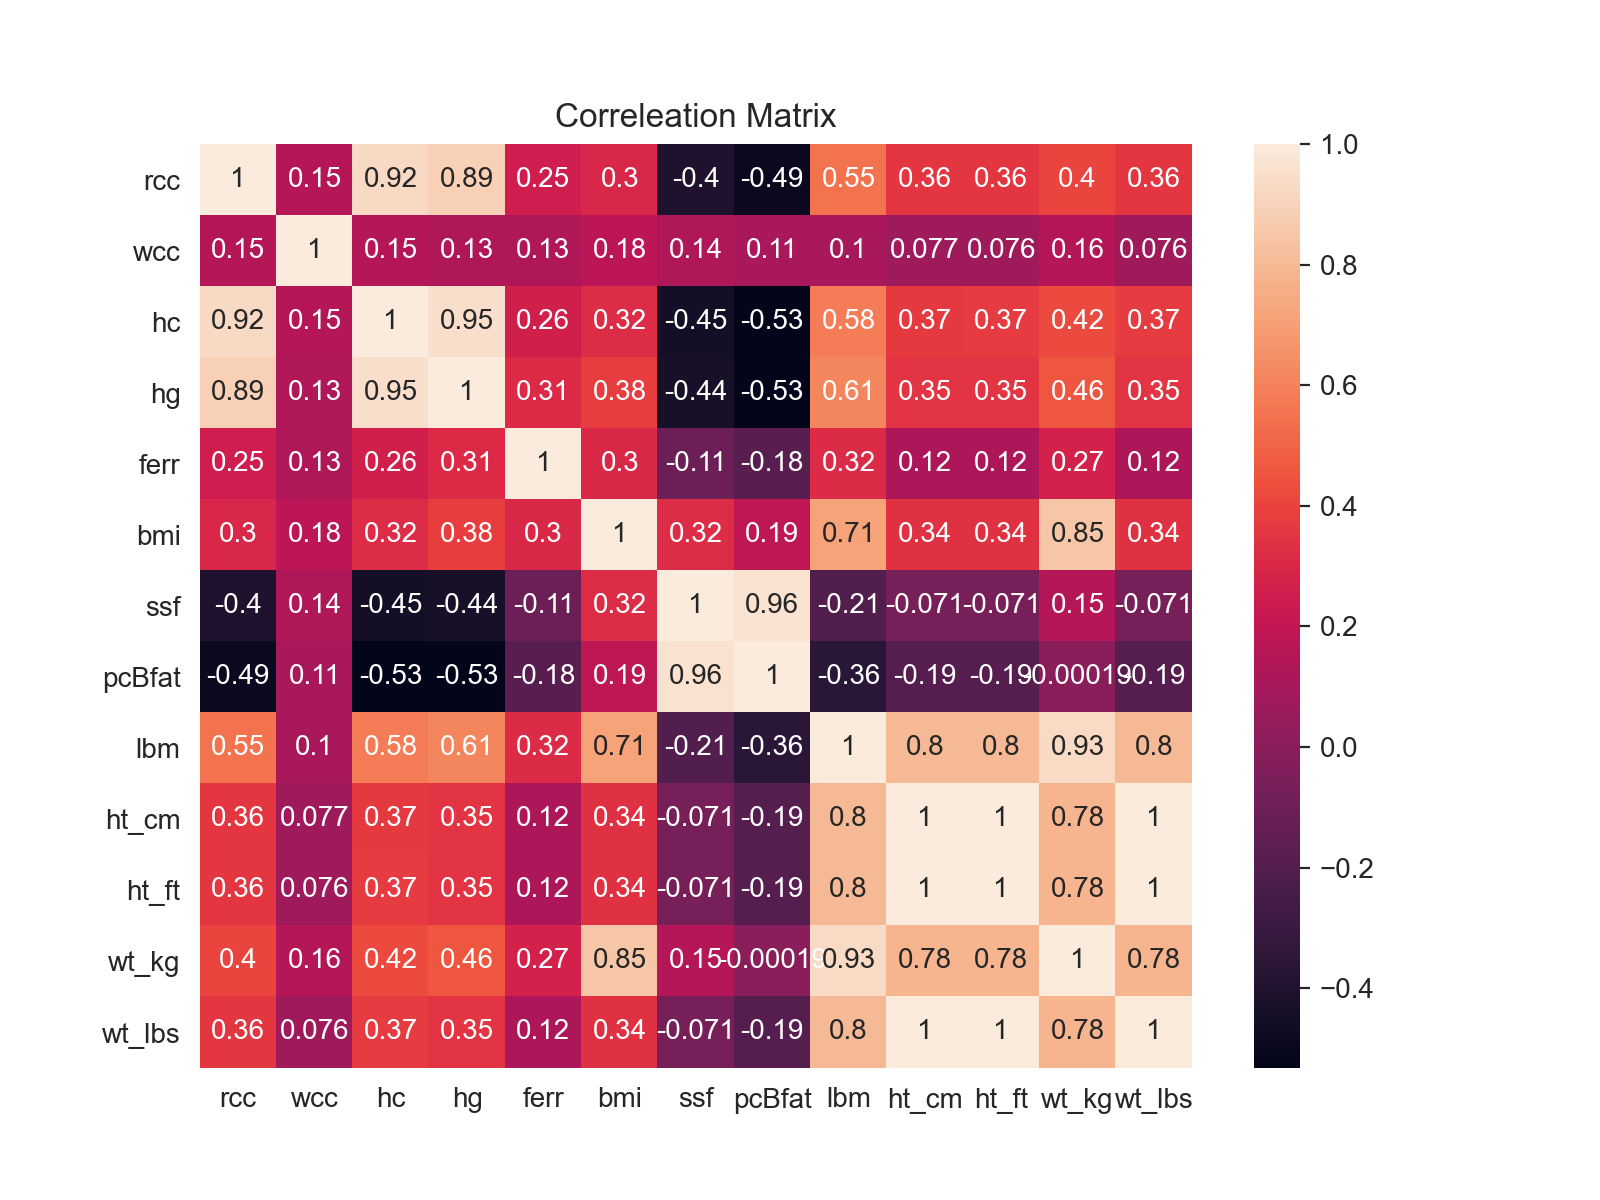

In [11]:
# Correleation Matrix

plt.figure(figsize=(8,6))
sns.heatmap(ausAth.corr(),annot=True)
plt.title("Correleation Matrix")
plt.show()

In [12]:
x = ausAth.ht_ft.values
y = ausAth.wt_kg.values

<IPython.core.display.Javascript object>


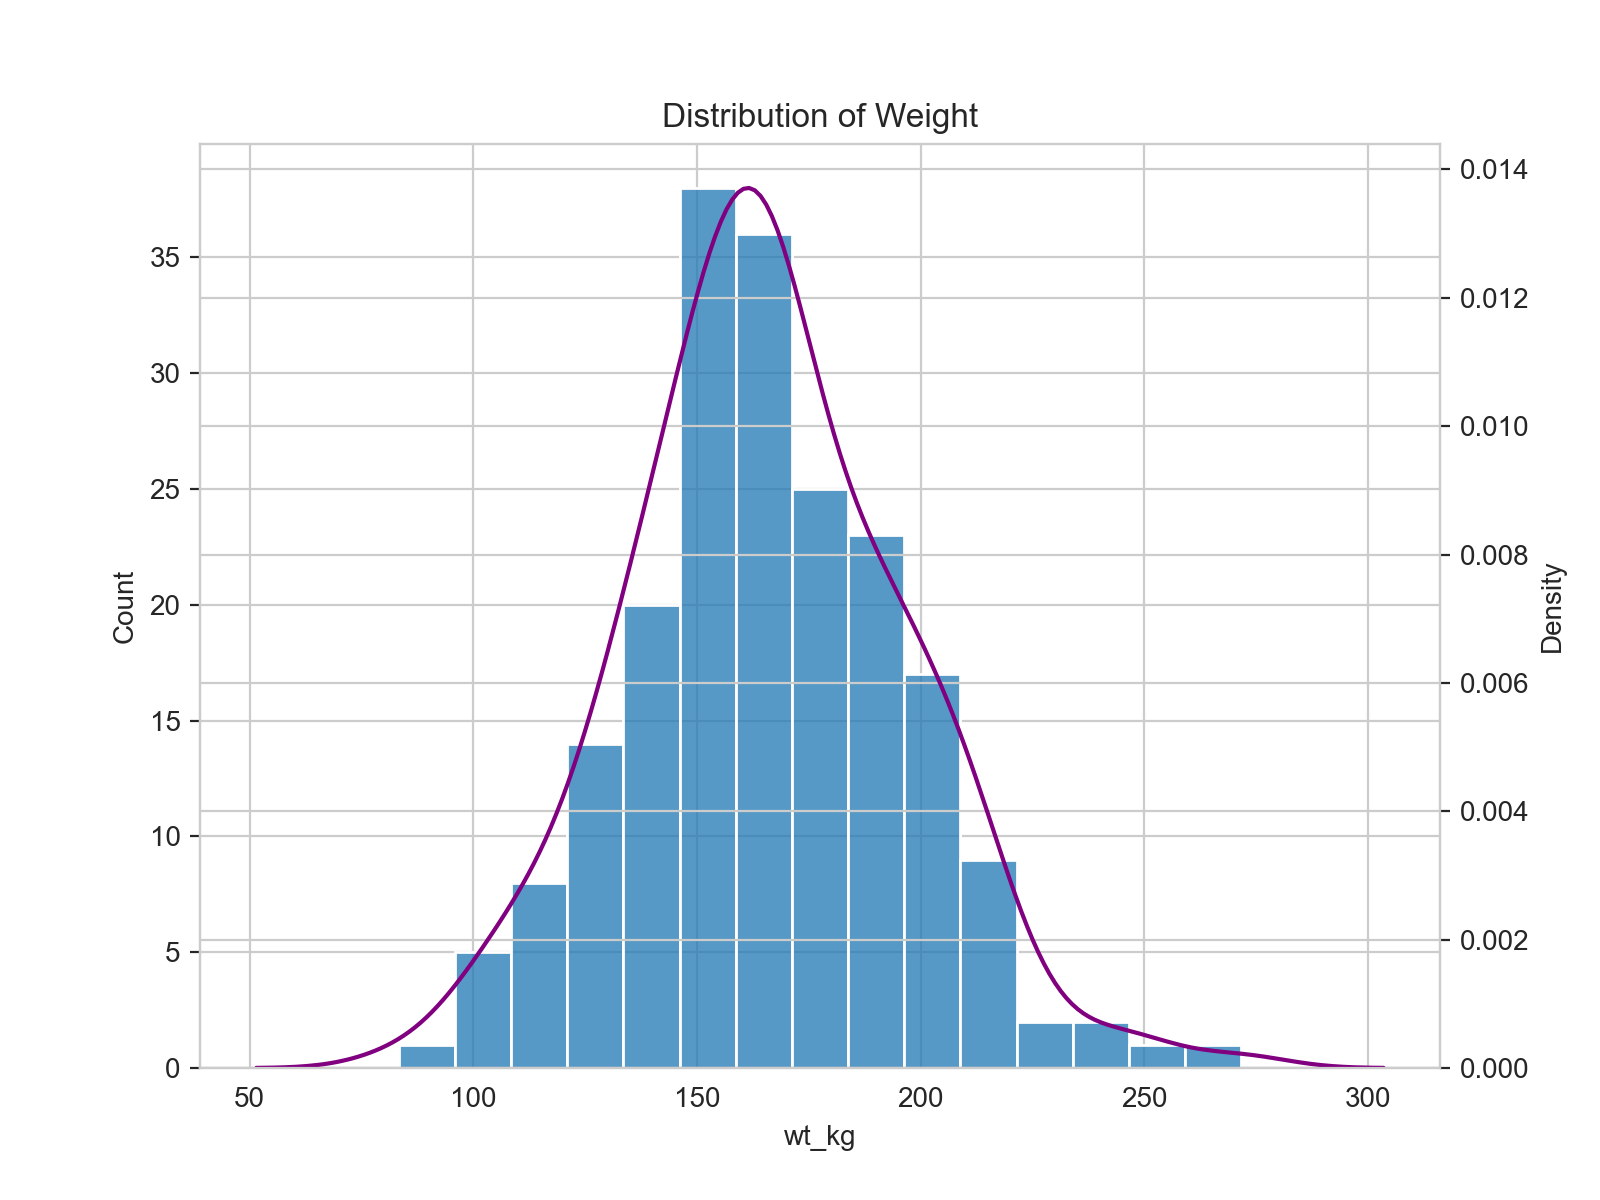

In [13]:
fig,ax =  plt.subplots(figsize=(8,6))
sns.histplot(wt_lbs)
ax2 = ax.twinx()
sns.kdeplot(wt_lbs, color="purple", ax=ax2)
plt.title("Distribution of Weight")
plt.show()

<IPython.core.display.Javascript object>


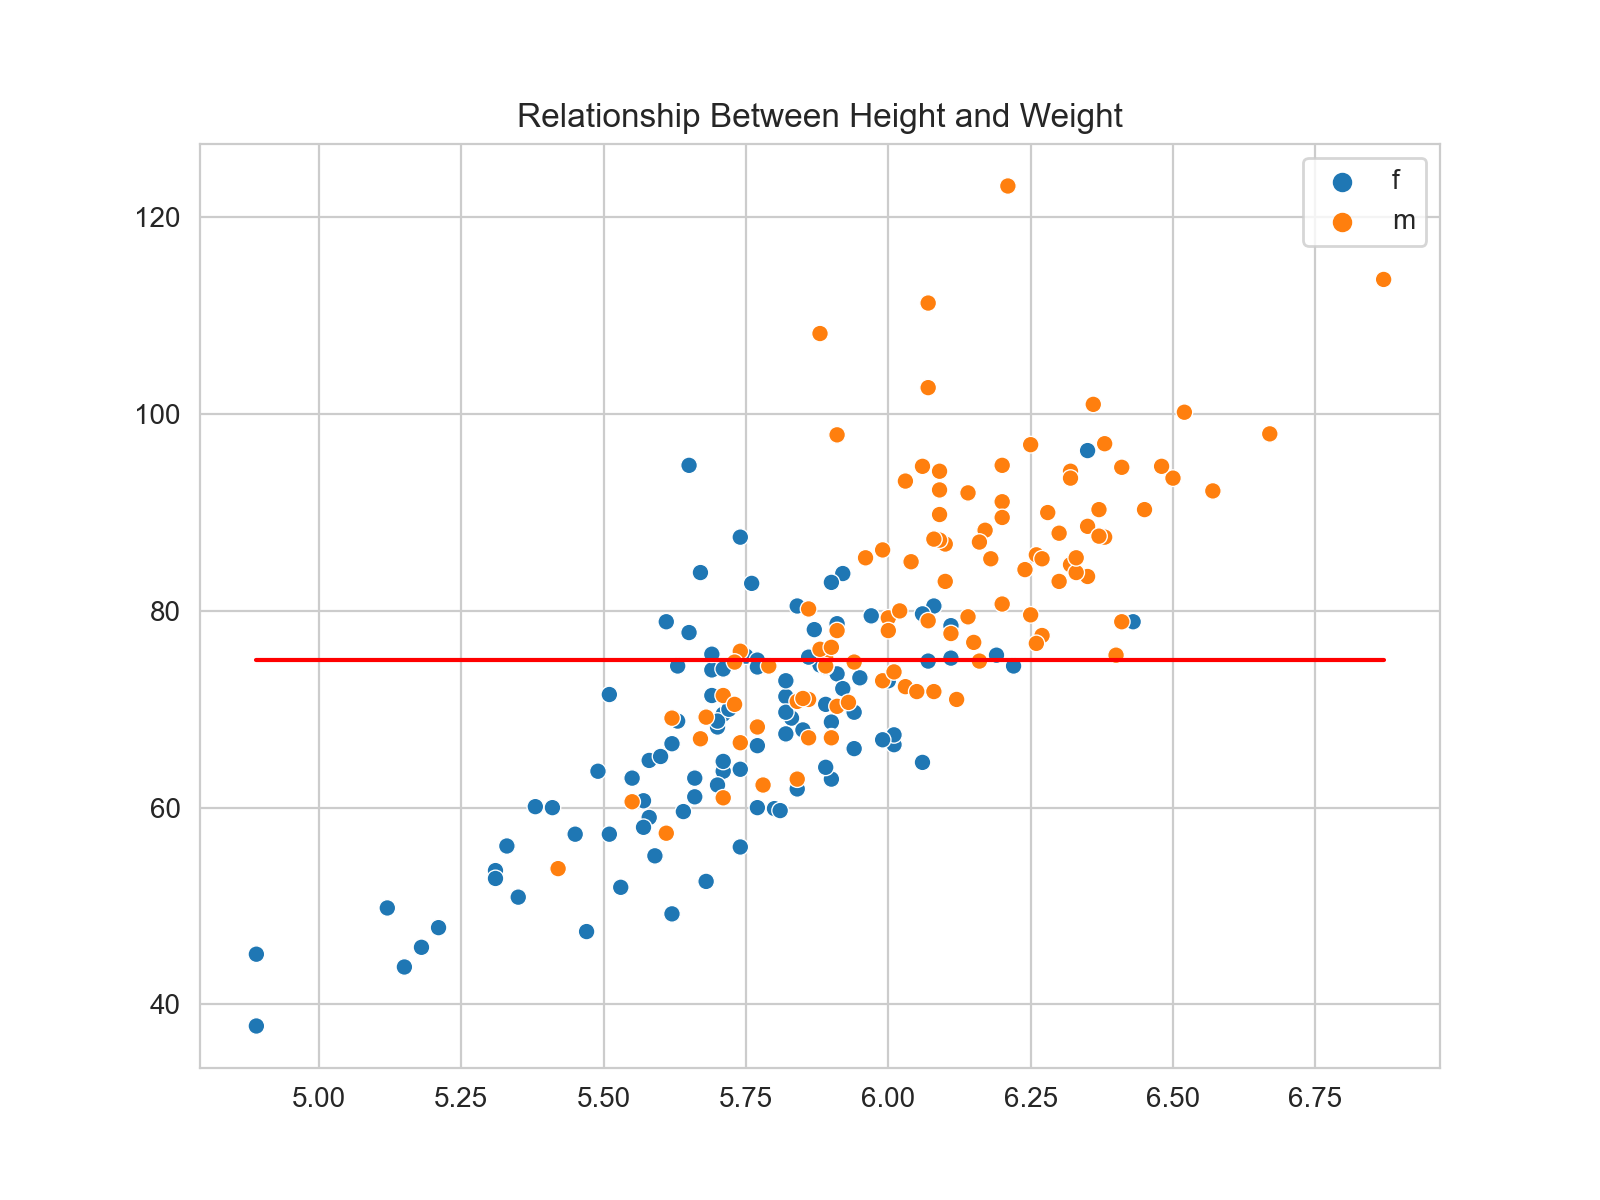

Pearson Correlation Coefficient: 0.78


In [14]:
fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(data=ausAth,x=x,y=y, hue="sex")
sns.lineplot(x=x, y=np.mean(y),color="red")
plt.title("Relationship Between Height and Weight")
plt.show()
print("Pearson Correlation Coefficient: {}".format(r2(stats.pearsonr(x,y)[0])))

In [15]:
print("Total Sum of Squares: {}".format(r2(sum((y - np.mean(y))**2))))

Total Sum of Squares: 38976.15


# Univariate Linear Regression

In [16]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=112)

In [17]:
lm = LinearRegression()

In [18]:
lm.fit(X_train.reshape(-1,1),y_train)

LinearRegression()

In [19]:
lm.coef_

array([36.30413076])

In [20]:
lm.intercept_

-139.53512763418132

In [21]:
y_pred = lm.predict(X_test.reshape(-1,1))

<IPython.core.display.Javascript object>


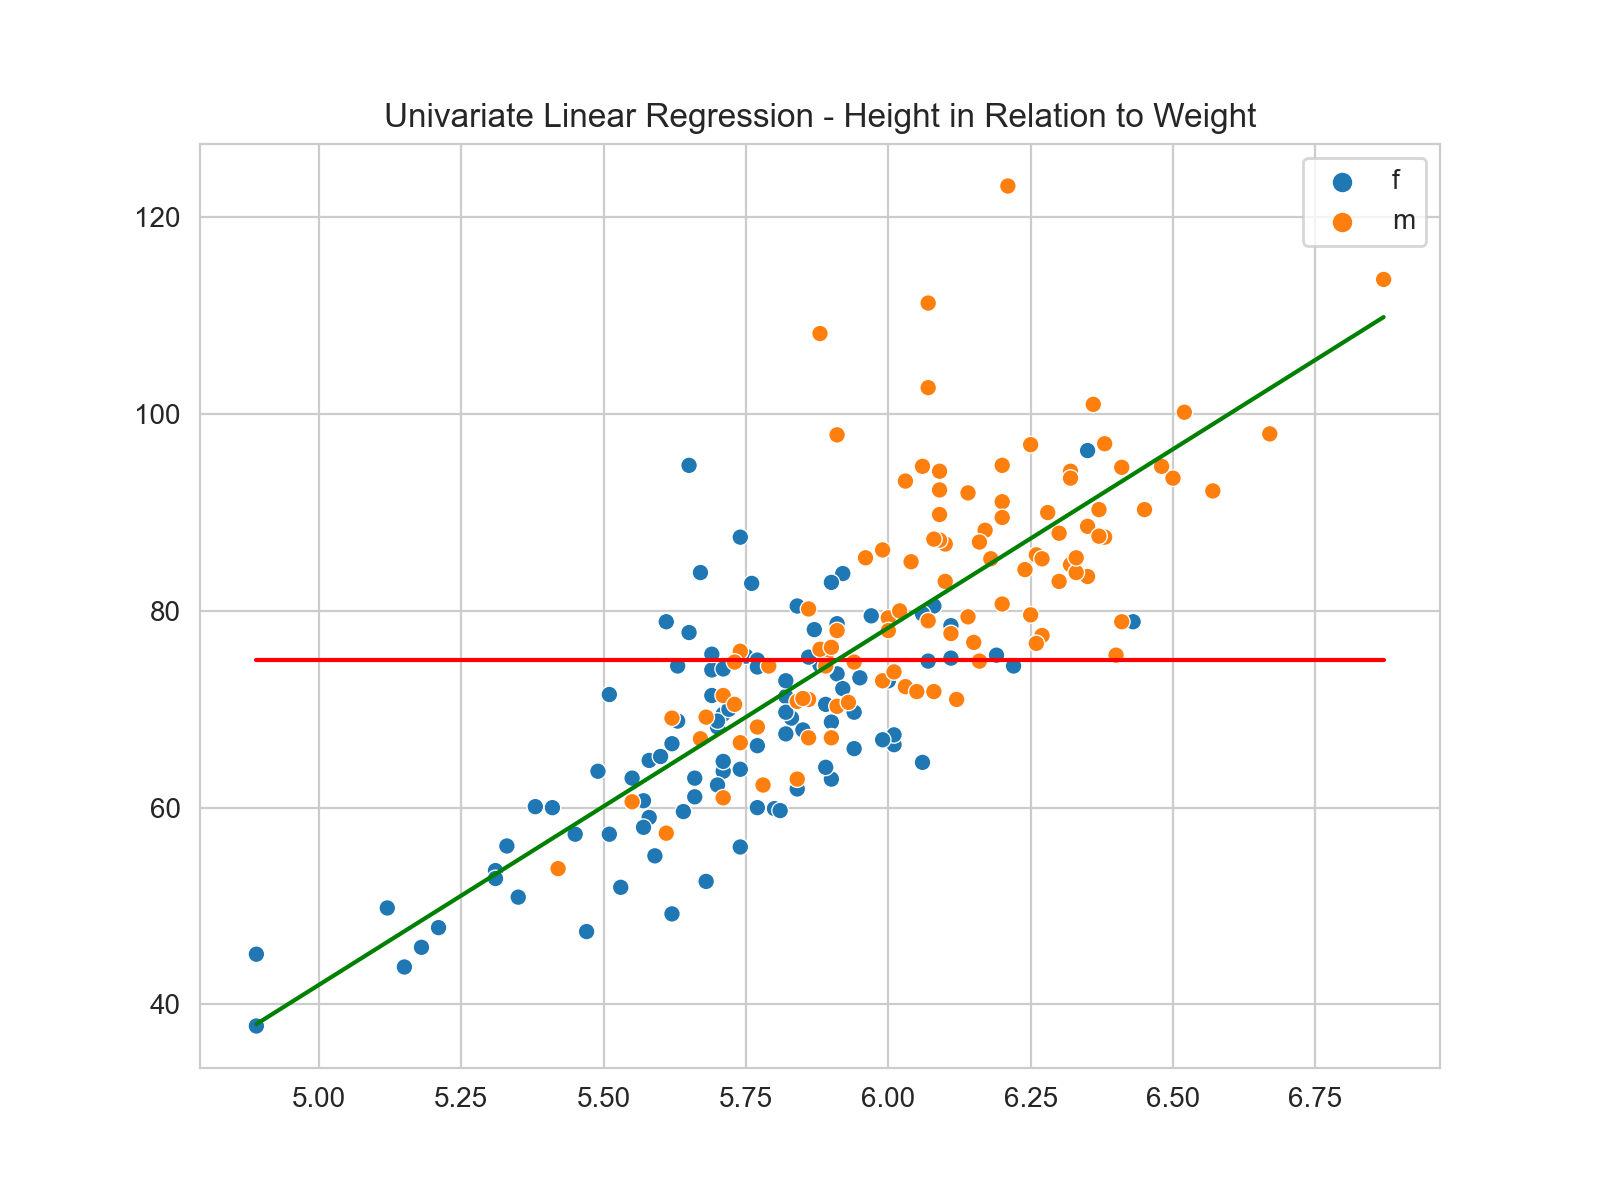

Pearson Correlation Coefficient: 0.78
R-Squared Value: 0.48


In [22]:
fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(data=ausAth,x=x,y=y, hue="sex")
sns.lineplot(x=x, y=np.mean(y),color="red")
sns.lineplot(x=x, y=lm.predict(x.reshape(-1,1)), color="green")
plt.title("Univariate Linear Regression - Height in Relation to Weight")
plt.show()
print("Pearson Correlation Coefficient: {}".format(r2(stats.pearsonr(x,y)[0])))
print("R-Squared Value: {}".format(r2(metrics.r2_score(y_test, y_pred))))

In [23]:
rss = r2(sum((y - lm.predict(x.reshape(-1,1))) ** 2))

In [24]:
tss = r2(sum((y - np.mean(y))**2))

In [25]:
r2(1 - (rss/tss))

0.61

In [26]:
r2(metrics.r2_score(y,lm.predict(x.reshape(-1,1))))

0.61

# Multiple Linear Regression

In [27]:
ausAth.head()

,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht_cm,ht_ft,wt_kg,wt_lbs,sex,sport
0,3.96,7.5,37.5,12.3,60,20.56,109.1,19.75,63.32,195.9,6.43,78.9,6.43,f,B_Ball
1,4.41,8.3,38.2,12.7,68,20.67,102.8,21.30,58.55,189.7,6.22,74.4,6.22,f,B_Ball
2,4.14,5.0,36.4,11.6,21,21.86,104.6,19.88,55.36,177.8,5.83,69.1,5.83,f,B_Ball
3,4.11,5.3,37.3,12.6,69,21.88,126.4,23.66,57.18,185.0,6.07,74.9,6.07,f,B_Ball
4,4.45,6.8,41.5,14.0,29,18.96,80.3,17.64,53.20,184.6,6.06,64.6,6.06,f,B_Ball


In [28]:
X = ausAth[["ht_ft","wt_kg","sex"]].values

y = ausAth.lbm.values

In [29]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [2])],remainder="passthrough")

In [30]:
# Encode Categorical variables

X = ct.fit_transform(X)[:,1:]

In [31]:
mvlm = LinearRegression()

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=112)

In [33]:
mvlm.fit(X_train,y_train)

LinearRegression()

In [34]:
ypred = mvlm.predict(X_test)

In [35]:
r2(metrics.r2_score(y_test,ypred))

0.95

<IPython.core.display.Javascript object>


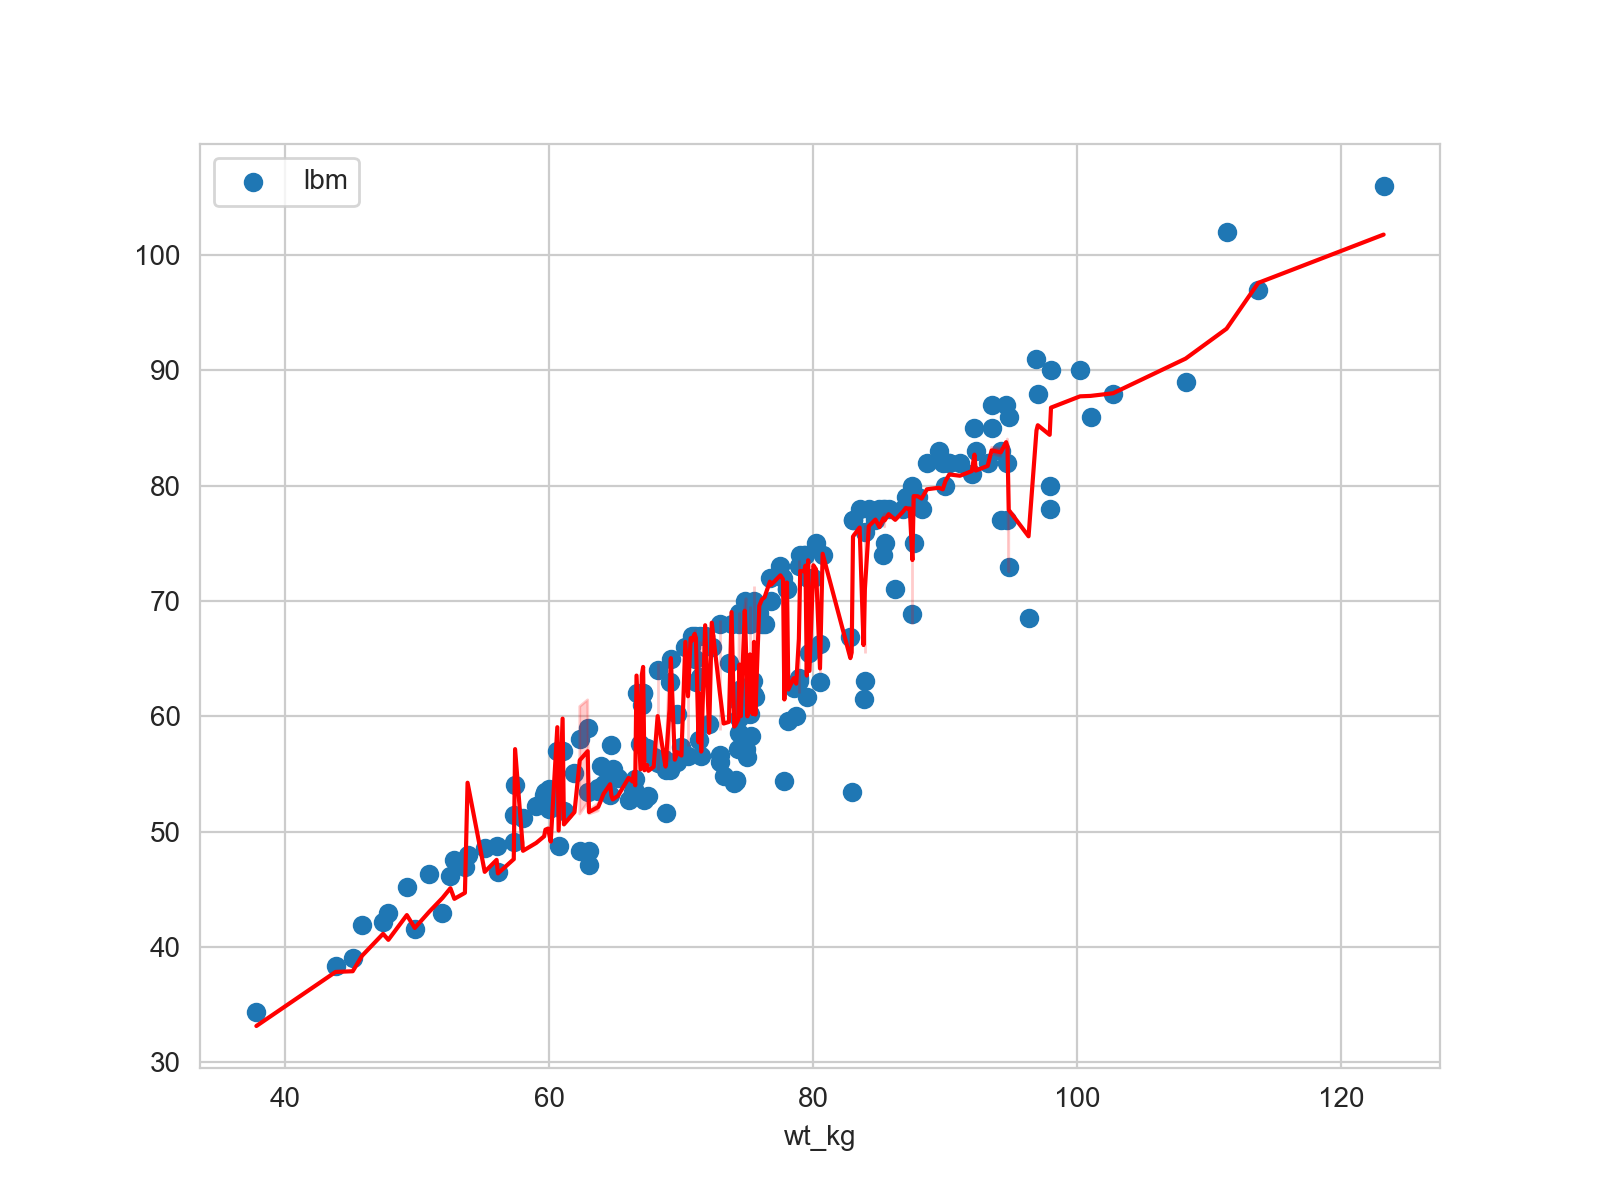

Variablility Explained by The Model: 0.95


In [36]:
plt.figure(figsize=(8,6))
plt.scatter(data=ausAth, x="wt_kg",y="lbm")
sns.lineplot(data=ausAth, x="wt_kg", y= mvlm.predict(X),color="red")
plt.show()
print("Variablility Explained by The Model: {}".format(r2(metrics.r2_score(y_test, ypred))))

# Support Vector Machine

In [37]:
# Scalers for variables as features need to be scaled for SVR

X_sc = StandardScaler()
y_sc = StandardScaler()

In [38]:
X = ausAth[["ht_ft","wt_kg","sex"]].values

y = ausAth.lbm.values

In [39]:
X = ct.fit_transform(X)[:,1:]

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=112)

In [41]:
X_train[:,1:] = X_sc.fit_transform(X_train[:,1:])
X_test[:,1:] = X_sc.fit_transform(X_test[:,1:])

In [42]:
y_train = y_sc.fit_transform(y_train.reshape(-1,1))

In [43]:
svm_regressor = SVR(kernel="rbf")

In [44]:
svm_regressor.fit(X_train, y_train.reshape(1,-1)[0])

SVR()

In [45]:
ypred = y_sc.inverse_transform(svm_regressor.predict(X_test))

In [46]:
r2(metrics.r2_score(y_test, ypred))

0.93

# Decission Tree

In [52]:
dt_regressor = DecisionTreeRegressor(random_state=112)

In [53]:
X = ausAth[["ht_ft","wt_kg","sex"]].values

y = ausAth.lbm.values

In [54]:
X = ct.fit_transform(X)[:,1:]

In [55]:
dt_regressor.fit(X,y)

DecisionTreeRegressor(random_state=112)

<IPython.core.display.Javascript object>


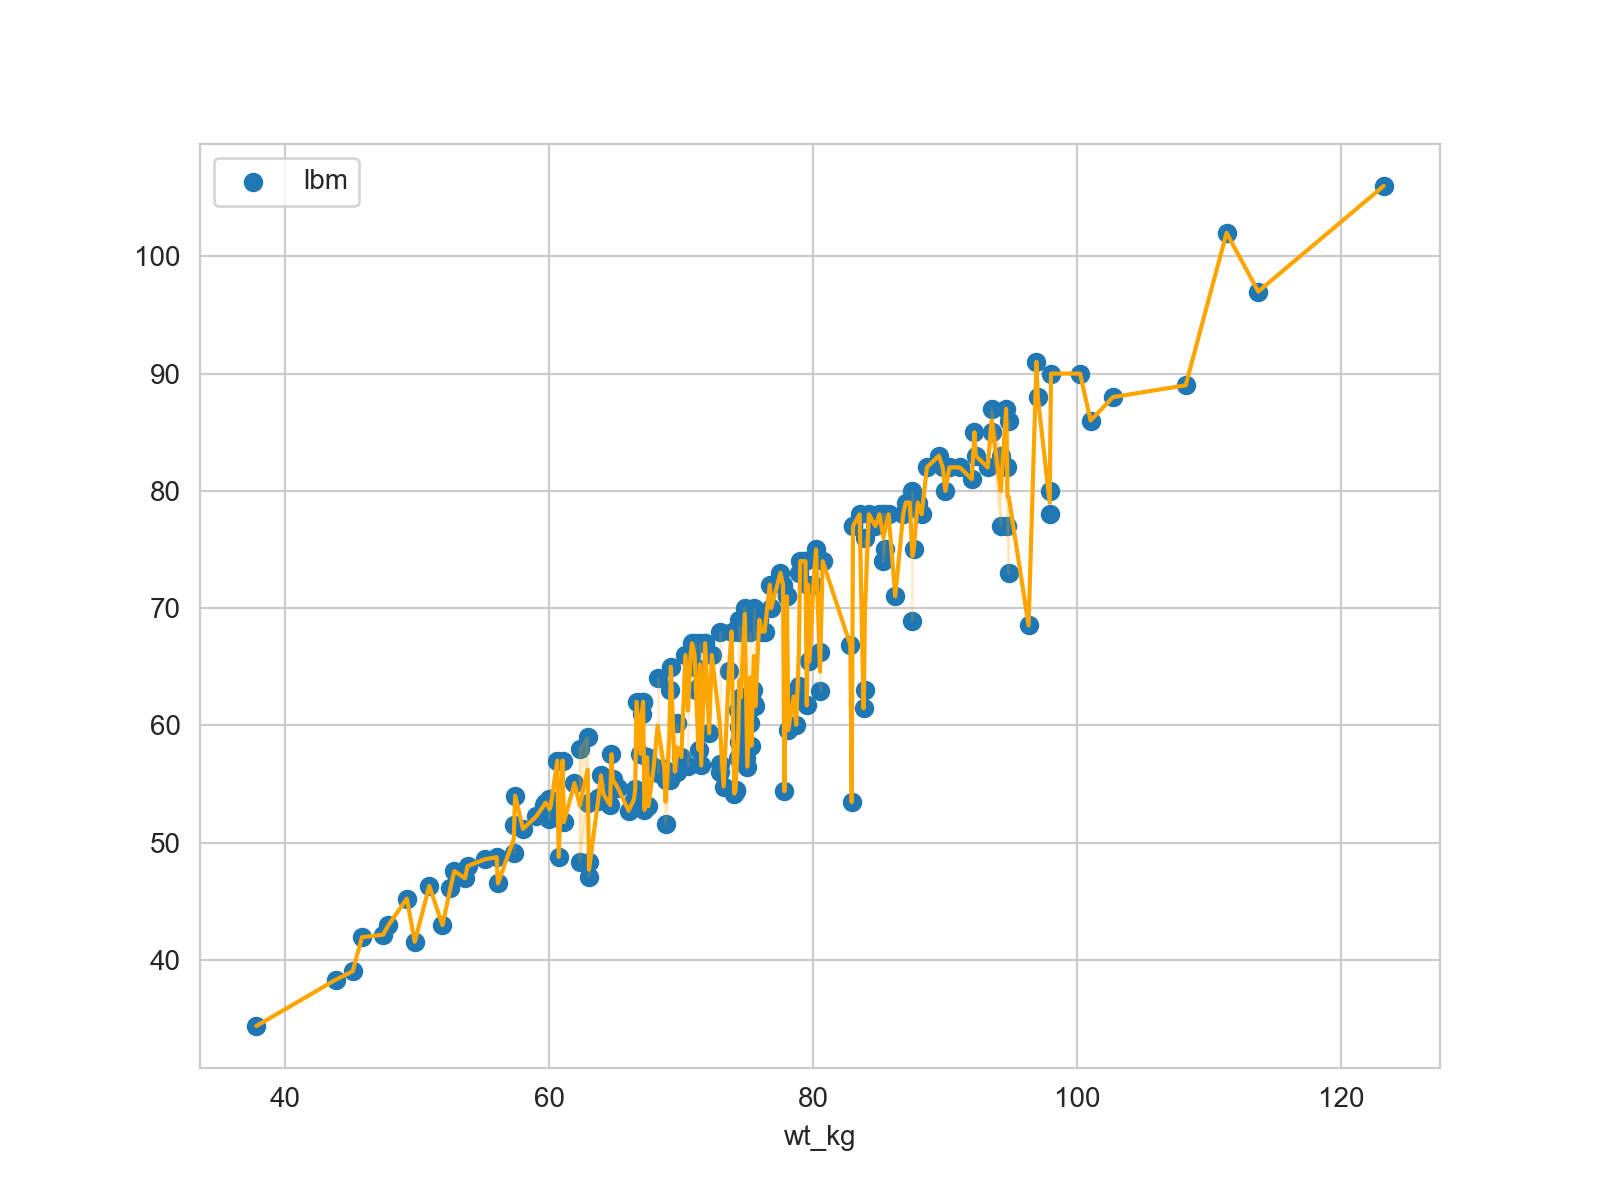

Variablilty Explained by The Model: 0.9999417171197177


In [56]:
plt.figure(figsize=(8,6))
plt.scatter(data=ausAth, x="wt_kg",y="lbm")
sns.lineplot(data=ausAth, x="wt_kg", y=dt_regressor.predict(X),color="orange")
plt.show()
print("Variablilty Explained by The Model: {}".format(metrics.r2_score(ausAth.lbm.values,dt_regressor.predict(X))))

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=112)

In [58]:
dt_regressor.fit(X_train,y_train)

DecisionTreeRegressor(random_state=112)

In [59]:
ypred = dt_regressor.predict(X_test)

In [60]:
r2(metrics.r2_score(y_test,ypred))

0.88

# Random Forest - (Regression)

In [61]:
ct = ColumnTransformer(transformers=[("encoder",OneHotEncoder(),[2])], remainder="passthrough")

In [62]:
X = ausAth[["ht_cm","wt_kg","sex"]].values
y = ausAth.lbm.values

In [63]:
X = ct.fit_transform(X)[:,1:]

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [65]:
forest = RandomForestRegressor(n_estimators=500, random_state=112)

In [66]:
forest.fit(X_train,y_train)

RandomForestRegressor(n_estimators=500, random_state=112)

In [67]:
ypred = forest.predict(X_test)

In [68]:
r2(metrics.r2_score(y_test,ypred))

0.93

<IPython.core.display.Javascript object>


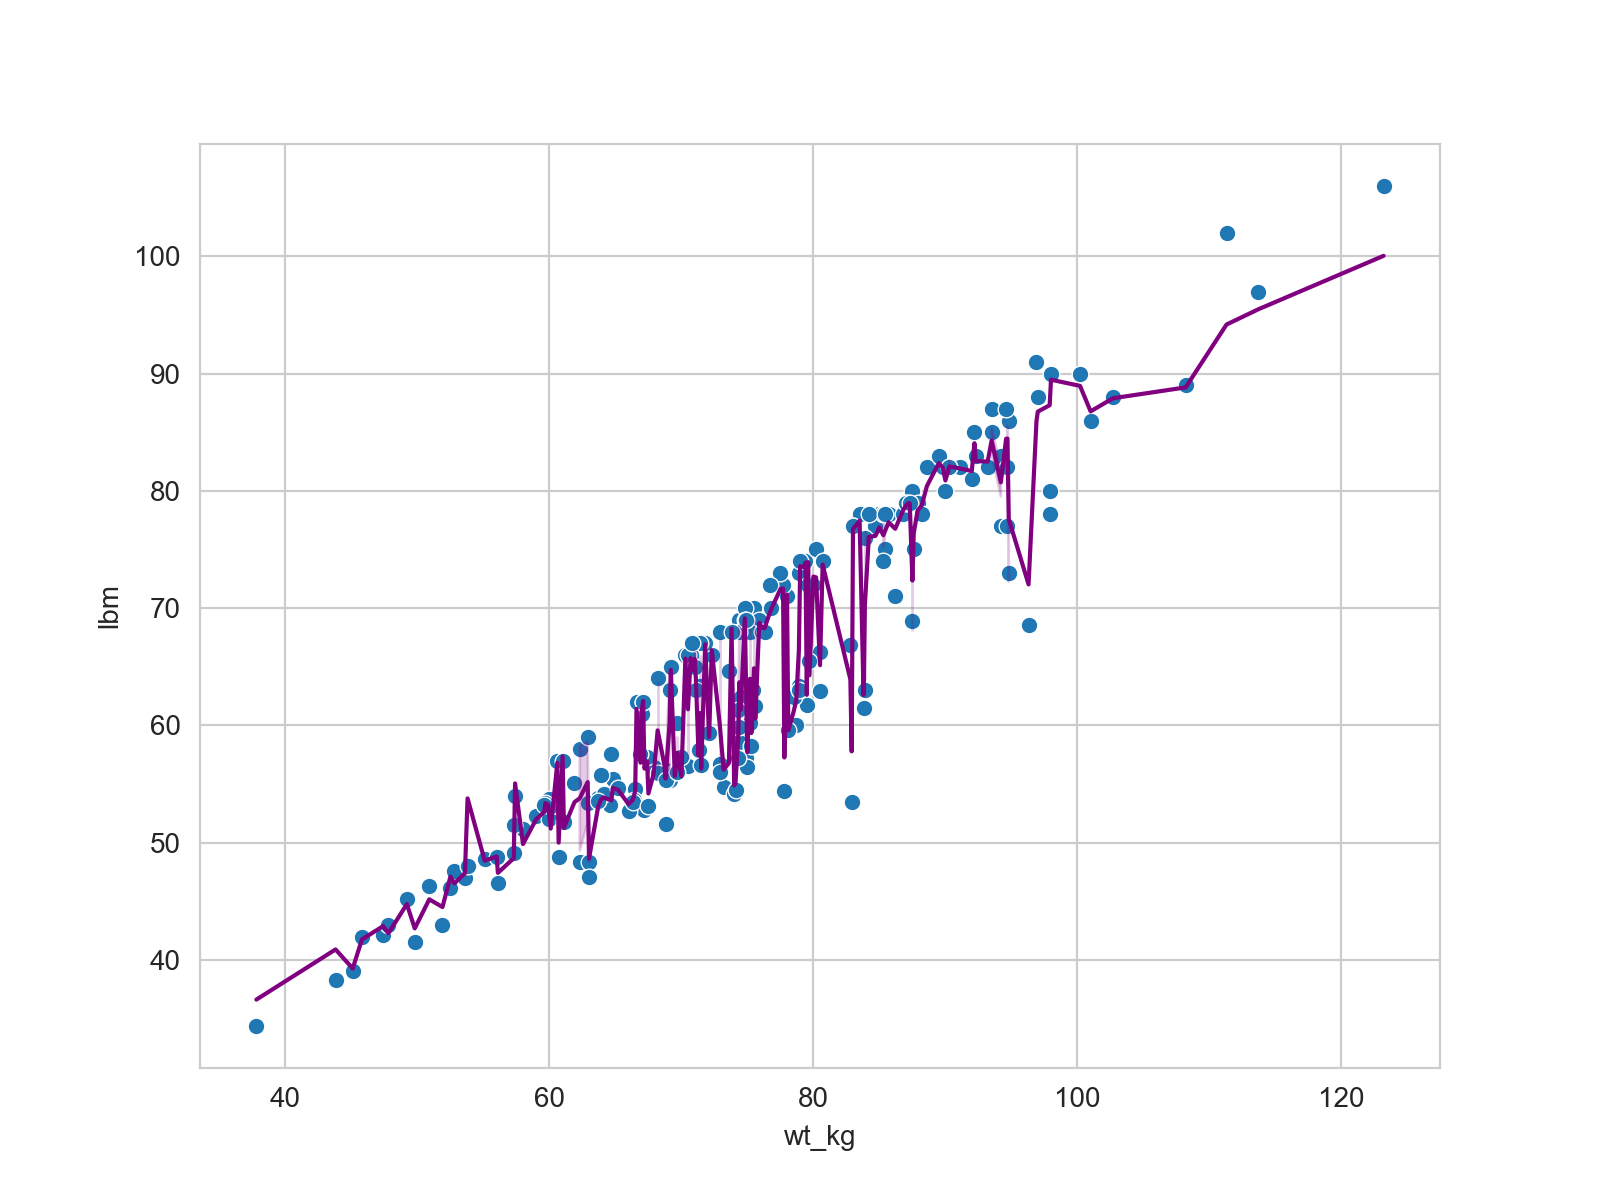

In [69]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=ausAth, x="wt_kg", y="lbm")
sns.lineplot(x=ausAth.wt_kg,y=forest.predict(X), color="purple")
plt.show()

In [70]:
metrics.mean_squared_error(y_test,ypred)

12.216467904015712

# RCC Male

In [71]:
rccMale = ausAth[ausAth.sex == "m"].rcc.values

<IPython.core.display.Javascript object>


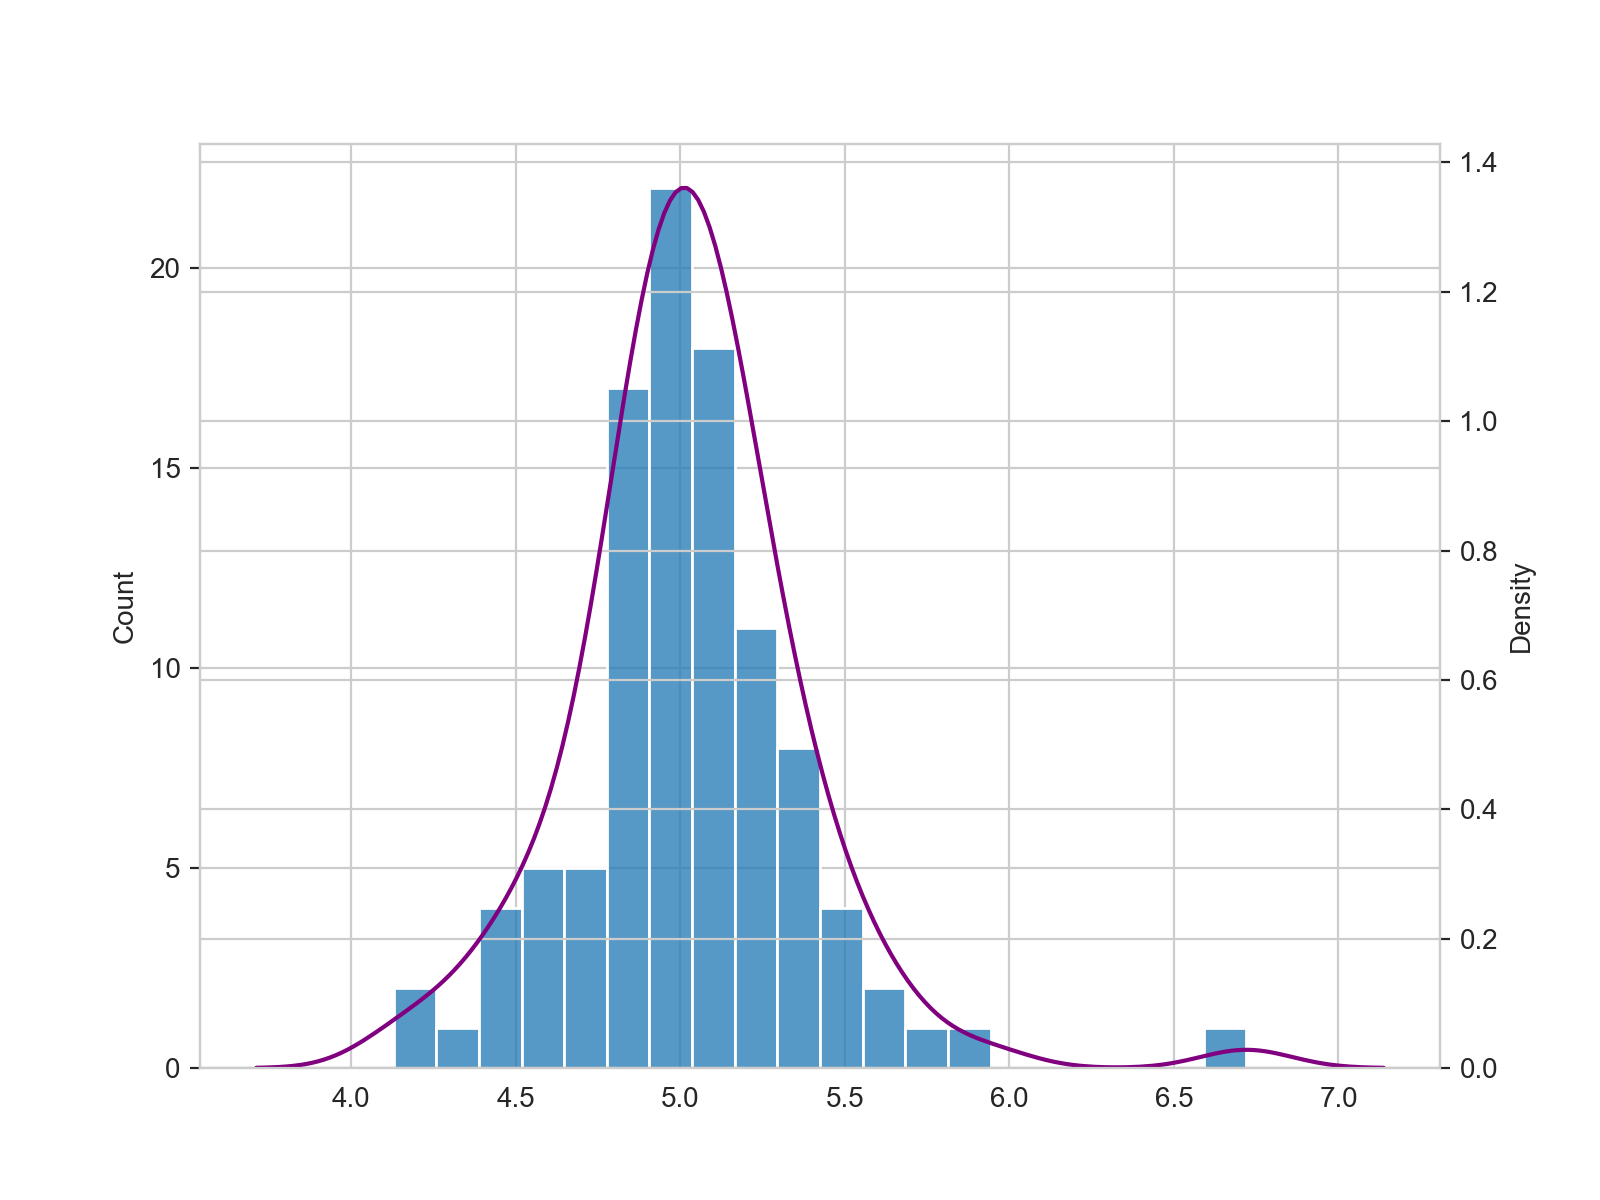

RCC Male Skew: 0.9240899140879637


In [72]:
fig, ax = plt.subplots(figsize=(8,6))
sns.histplot(rccMale)
ax2 = ax.twinx()
sns.kdeplot(rccMale, color="purple",ax=ax2)
plt.show()
print("RCC Male Skew: {}".format(stats.skew(rccMale)))

In [73]:
alpha = 0.05
n = len(rccMale)
n_sqrt = r2(np.sqrt(n))
x_mean = r2(np.mean(rccMale))
x_std = r2(np.std(rccMale))
se = r2(x_std/n_sqrt)
tCrit = r2(stats.t.ppf(1-alpha/2, df=n-1))
me = r2(tCrit * se)
ci95 = namedtuple("ConfidenceInterval95",["Low","high"])(r2(x_mean - me),r2(x_mean + me))
ci95

ConfidenceInterval95(Low=4.97, high=5.09)